<a href="https://colab.research.google.com/github/HoangHungLN/MachineLearning_Assigment/blob/main/Assignment1_CEML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
##Xử lý dữ liệu
  #Thêm thư viện
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

dataset_url = "https://raw.githubusercontent.com/HoangHungLN/MachineLearning_Assigment/refs/heads/main/mobiles_uncleaned.csv"
raw_data = pd.read_csv(dataset_url)
raw_data = raw_data.replace({r'â€‰':''}, regex=True)
  #in ra vài dòng của dữ liệu
raw_data.head(5)

,name,price,spec_score,user_rating,connectivity,cpu,ram,battery,display,camera,expandable,os,fm_radio,other
0,Samsung Galaxy S24 FE 5G,34999,84.0,4.00,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC","Exynos 2400e, Deca Core, 3.11 GHz Processor","8 GB RAM, 128 GB inbuilt",4700 mAh Battery with 25W Fast Charging,"6.7 inches, 1080 x 2340 px, 120 Hz Display wit...",50 MP + 12 MP + 8 MP Triple Rear & 10 MP Front...,Memory Card Not Supported,Android v14,NaN,NaN
1,Samsung Galaxy S24 Ultra,84949,92.0,4.35,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC","Snapdragon 8 Gen3, Octa Core, 3.3 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 45W Fast Charging,"6.8 inches, 1440 x 3120 px, 120 Hz Display wit...",200 MP Quad Rear & 12 MP Front Camera,Memory Card Not Supported,Android v14,NaN,NaN
2,Samsung Galaxy S25 Edge,109999,89.0,4.45,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC","Snapdragon 8Elite, Octa Core, 4.47 GHz Processor","12 GB RAM, 256 GB inbuilt",3900 mAh Battery with 25W Fast Charging,"6.7 inches, 1440 x 3120 px, 120 Hz Display wit...",200 MP + 12 MP Dual Rear & 12 MP Front Camera,NaN,Android v15,No FM Radio,NaN
3,Samsung Galaxy M36 5G,19990,82.0,4.55,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Exynos 1380, Octa Core, 2.4 GHz Processor","8 GB RAM, 128 GB inbuilt",6500 mAh Battery with 25W Fast Charging,"6.74 inches, 1080 x 2340 px, 120 Hz Display wi...",50 MP + 12 MP + 5 MP Triple Rear & 16 MP Front...,"Memory Card (Hybrid), upto 1 TB",Android v15,NaN,NaN
4,Samsung Galaxy M06 5G,7999,72.0,4.00,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 6300, Octa Core, 2.4 GHz Processor","4 GB RAM, 128 GB inbuilt",5000 mAh Battery with 25W Fast Charging,"6.74 inches, 720 x 1600 px, 90 Hz Display with...",50 MP + 2 MP Dual Rear & 8 MP Front Camera,"Memory Card (Hybrid), upto 1.5 TB",Android v15,NaN,NaN


In [85]:
  #kiểm tra số lượng mẫu và thuộc tính gốc của dữ liệu
  print ("Số lượng mẫu có trong dataset là:", raw_data.shape[0])
  print ("Số lượng thuộc tính có trong dataset là:", raw_data.shape[1])


Số lượng mẫu có trong dataset là: 11786
Số lượng thuộc tính có trong dataset là: 14


Trong bộ dữ liệu này, các thuộc tính bị thiếu được kí hiệu là NULL, sau đây nhóm em sẽ tiến hành chuyển dữ liệu thiếu thành NaN để dễ thống kê

In [86]:
raw_data.replace("NULL", np.nan, inplace=True)
missing_count = raw_data.isna().sum()
print(missing_count)

name                0
price               0
spec_score          8
user_rating        20
connectivity       11
cpu              2157
ram              1261
battery           138
display            16
camera             20
expandable       1770
os               2963
fm_radio        10229
other           11785
dtype: int64


Để trực quan hóa thì nhóm sẽ tạo dữ liệu dạng bảng để thống kê các giá trị bị thiếu
  

In [87]:
missing_rate = (missing_count / len(raw_data) * 100).round(2)
missing_data = pd.DataFrame({'Missing Count': missing_count, 'Missing Rate': missing_rate}).sort_values(by='Missing Rate', ascending=False)
missing_data.index.name = 'Feature'
#in ra bảng giá trị missing value
missing_data

,Missing Count,Missing Rate
Feature,,
other,11785,99.99
fm_radio,10229,86.79
os,2963,25.14
cpu,2157,18.30
expandable,1770,15.02
ram,1261,10.70
battery,138,1.17
user_rating,20,0.17
camera,20,0.17


In [88]:
print ("\n-----------------------------------------------------------------------------------Describe (numeric)--------------------------------------------------------------------------------------------")
mum_summary = raw_data.describe().round(2).T.reset_index()
mum_summary = mum_summary.rename(columns={'index': 'Feature'}).set_index('Feature')
mum_summary



-----------------------------------------------------------------------------------Describe (numeric)--------------------------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
Feature,,,,,,,,
price,11786.0,17187.61,23707.84,178.0,3000.00,9490.00,20999.0,480000.0
spec_score,11778.0,51.94,26.66,3.0,24.00,58.00,76.0,98.0
user_rating,11766.0,4.18,0.48,0.5,4.05,4.25,4.5,5.0


Khi chạy lệnh nêu các đặc trưng của các biến định lượng thì ra thấy được rằng


1.   Về thuộc tính giá (price)

  *   Giá trị trung bình của các điện thoại là 117187,61

  *   Độ lệch chuẩn của thuộc tính khá lớn (23707,84) cho thấy dữ liệu phân tán mạnh, không tập trung xung quanh giá trị trung bình
  
  * Nhiều khả năng tồn tại giá trị ngoại lai với mức giá quá cao hoặc quá thấp,dẫn đến phân phối bị lệch và kéo giá trị trung bình lên khá cao so với giá trị trung vị 9490


2.   Về thuộc tính điểm cấu hình (spec_score)

  * Giá trị trung bình của điểm cấu hình là 51,94 điểm, trung vị là 58 điểm
  * Độ lệch chuẩn là 26,66 được xem là khá lớn so với thang điểm 100, điều này có thấy dữ liệu trải rộng
  *Nhìn chung, vì giá trị trung bình nhỏ hơn trung vị nên phân phối có xu hướng lệch trái, nhưng vẫn cần sử dụng đồ thij để trực quan hơn

3. Về thuộc tính đánh giá của khách hàng (user_rating)
* Giá trị trung bình của đánh giá người dùng là 4.18 trên thang điểm 5, với trung vị là 4,25
* Độ lệch chuẩn nhỏ (0.48) cho thấy tập dữ liệu tập trung xung quanh giá trị trung bình
* Phân phối nghiên về các giá trị cao cho thấy điện thoại trong tập dữ liệu nhận được nhiều đánh giá tích cực từ người dùng, ít khi bị điểm thấp


In [89]:
#Thêm thư viện để hiển thị đẹp trong Colab

cat_summary = raw_data.describe(include='object').T.reset_index()  # transpose để cột thành hàng
cat_summary = cat_summary.rename(columns={'index': 'Feature'}).set_index('Feature') #đổi tên cột index thành Feature
print ("\n-----------------------------------------------------------------------------------Describe (categorical)--------------------------------------------------------------------------------------------")
cat_summary


-----------------------------------------------------------------------------------Describe (categorical)--------------------------------------------------------------------------------------------


,count,unique,top,freq
Feature,,,,
name,11786,11468,Realme 9i 5G (6GB RAM + 128GB),3
connectivity,11775,68,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",2554
cpu,9629,1461,"Quad Core, 1.3 GHz Processor",399
ram,10525,443,"8 GB RAM, 128 GB inbuilt",1143
battery,11648,955,1000 mAh Battery,695
display,11770,1751,"2.4 inches, 240 x 320 px Display",681
camera,11766,1142,0.3 MP Rear Camera,1227
expandable,10016,31,"Memory Card Supported, upto 32 GB",2261
os,8823,184,Android v11,818


Khi chạy thống kê mô tả của các biến định tính ta thấy rằng:
* _name_ : có 11,468 giá trị duy nhất trên 11,786 dòng (gần như mỗi dòng là một model khác nhau). Điều này làm cột này không hữu ích để phân tích thống kê hoặc mô hình hóa (có thể bỏ hoặc chỉ dùng để tham khảo).

* _connectivity_ : gồm 68 loại, trong đó phổ biến nhất là “Dual Sim, 3G, 4G, VoLTE, Wi-Fi” (≈ 2,554 bản ghi). Đây là một thuộc tính có thể mã hóa và sử dụng.

* _cpu_ : có 1,461 loại, phổ biến nhất là “Quad Core, 1.3 GHz Processor” (~399 bản ghi). Tuy nhiên cột này có nhiều missing values (chỉ 9,629/11,786 bản ghi).

* _ram_ : gồm 443 loại, phổ biến nhất “8 GB RAM, 128 GB inbuilt” (~1,143 bản ghi). Thuộc tính này khá chi tiết nhưng còn phân mảnh nhiều.

* _battery_ : gồm 955 loại, phổ biến nhất “1000 mAh Battery” (~695 bản ghi). Có nhiều kiểu pin khác nhau, dữ liệu phân tán.

* _display_ : gồm 1,751 loại, phổ biến nhất “2.4 inches, 240x320px Display” (~681 bản ghi). Đa dạng, có thể cần chuẩn hóa (inch + độ phân giải tách riêng).

* _camera_ : gồm 1,142 loại, phổ biến nhất “0.3 MP Rear Camera” (~1,227 bản ghi). Dữ liệu có xu hướng cụ thể nhưng nhiều dạng trình bày khác nhau.

* _expandable_ : gồm 31 loại, phổ biến nhất “Memory Card Supported, upto 32GB” (~2,261 bản ghi). Đây là một biến categorical khá gọn.

* _os_ : gồm 184 loại, phổ biến nhất “Android v11” (~818 bản ghi). Có nhiều phiên bản Android khác nhau, cần chuẩn hóa nhóm.

* _fm_radio_ : dữ liệu khá thiếu, chỉ 1,557 bản ghi có thông tin (toàn bộ là “No FM Radio”). Giá trị phân loại này không đa dạng.

* _other_ : toàn bộ chỉ có một giá trị “Wi-Fi” → không có giá trị phân biệt, có thể bỏ khỏi mô hình

Qua đây ta có nhận xét rằng: Các thuộc tính như tên sản phẩm (name), fm radio và other có thể cân nhắc để loại bỏ ra khỏi mô hình. Ngoài ra cần chuẩn hóa các thuộc tính khác để có thể đem lại kết quả tốt nhất khi huấn luyện mô hình

Nhóm em tiến hành vẽ các biểu đồ để nhận xét mối uan hệ giữa các biến

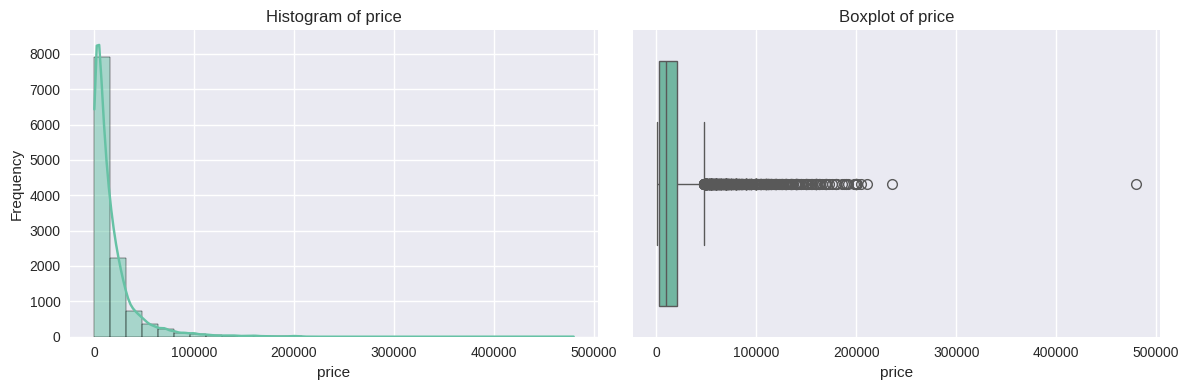

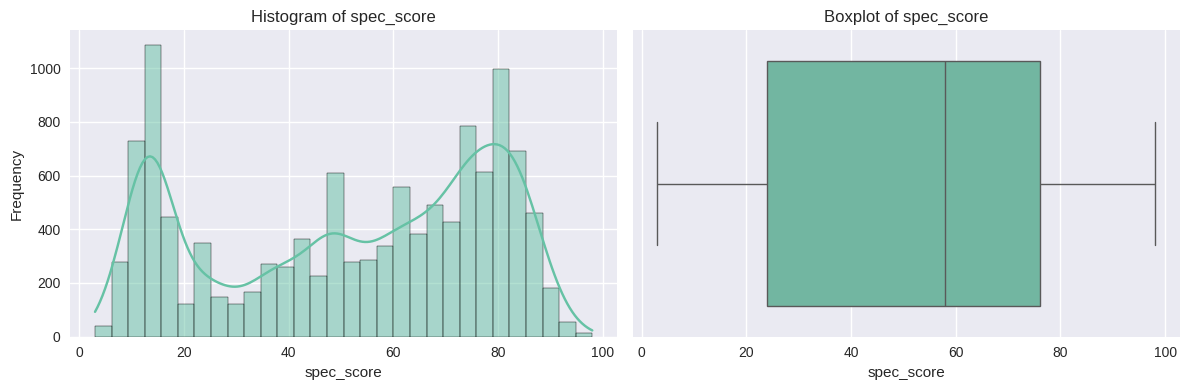

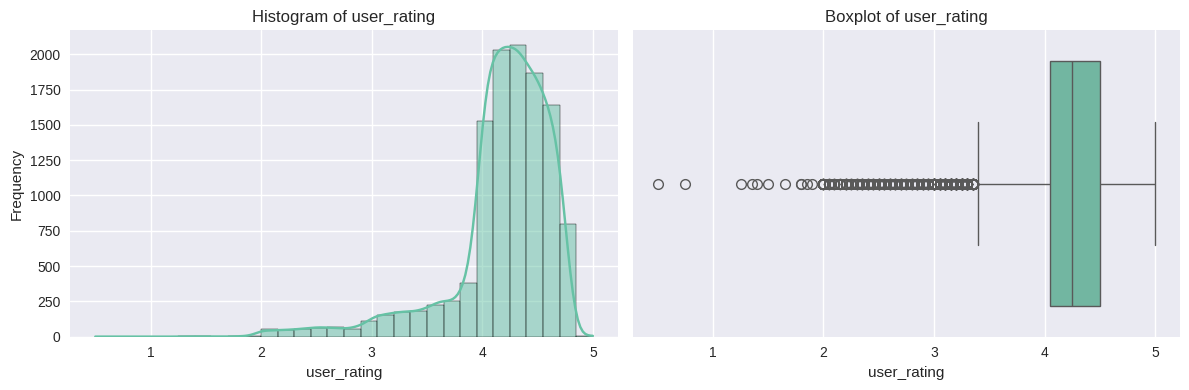

In [90]:
um_cols = raw_data.select_dtypes(include='number').columns

for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))  # 1 hàng 2 cột

    # Histogram + KDE
    sns.histplot(raw_data[col], kde=True, bins=30, ax=axes[0])
    axes[0].set_title(f"Histogram of {col}")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Frequency")

    # Boxplot
    sns.boxplot(x=raw_data[col], ax=axes[1])
    axes[1].set_title(f"Boxplot of {col}")
    axes[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()

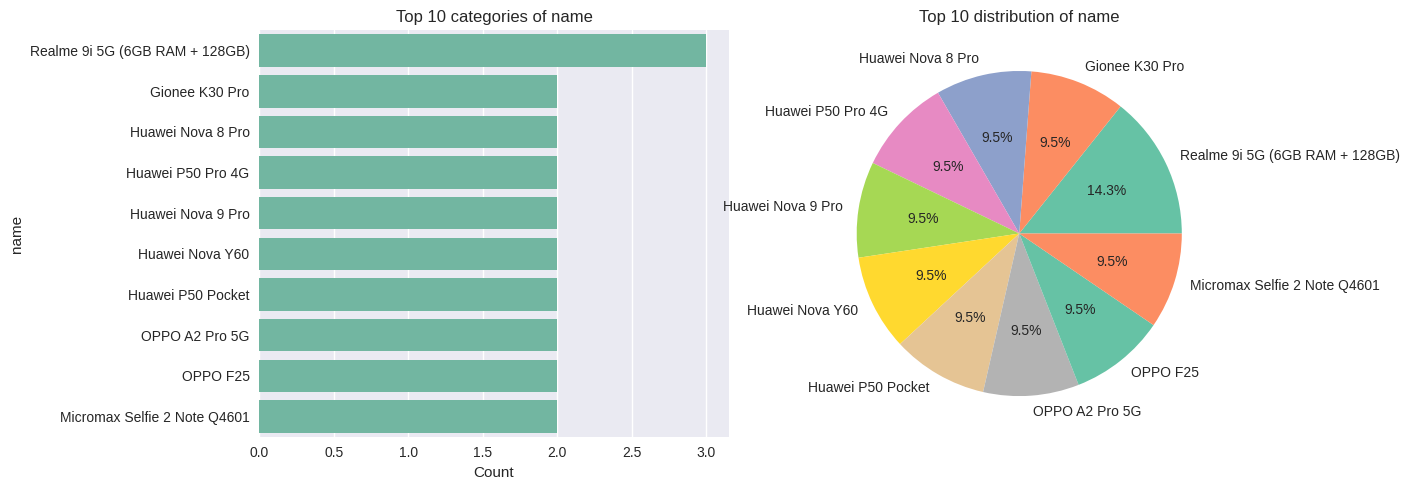

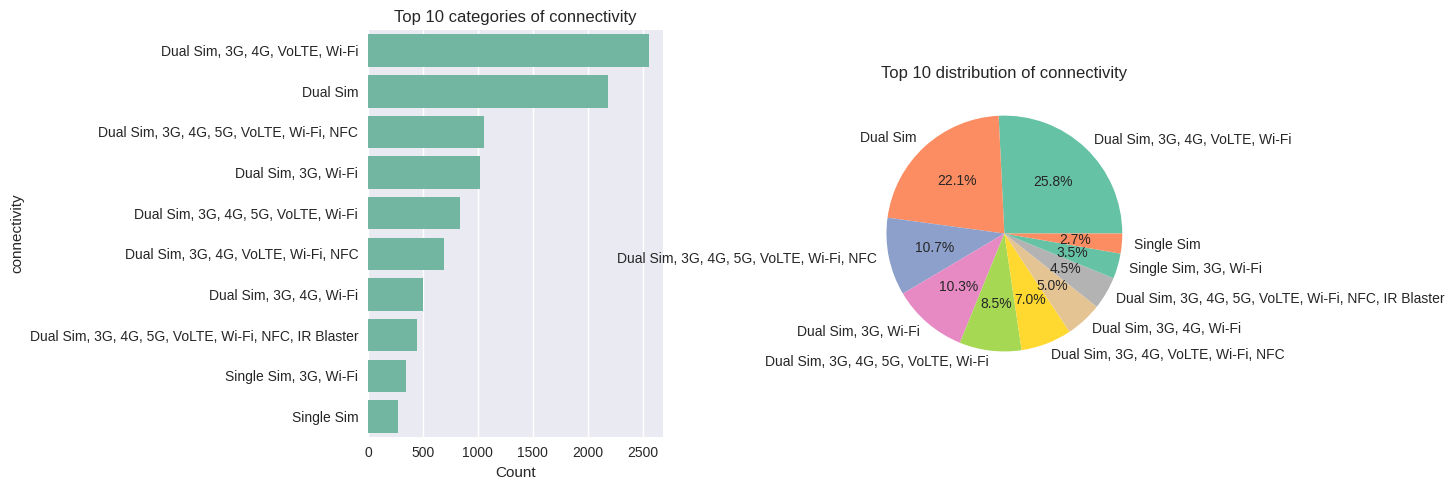

/tmp/ipython-input-897331548.py:22: UserWarning: Glyph 8201 (\N{THIN SPACE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8201 (\N{THIN SPACE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


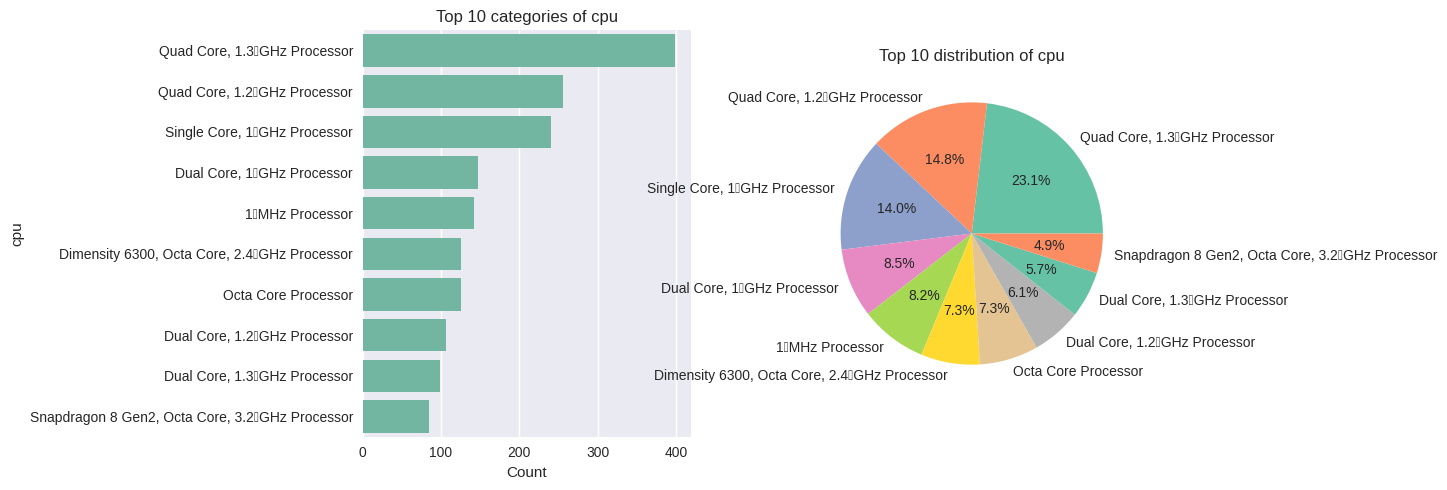

/tmp/ipython-input-897331548.py:22: UserWarning: Glyph 8201 (\N{THIN SPACE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8201 (\N{THIN SPACE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


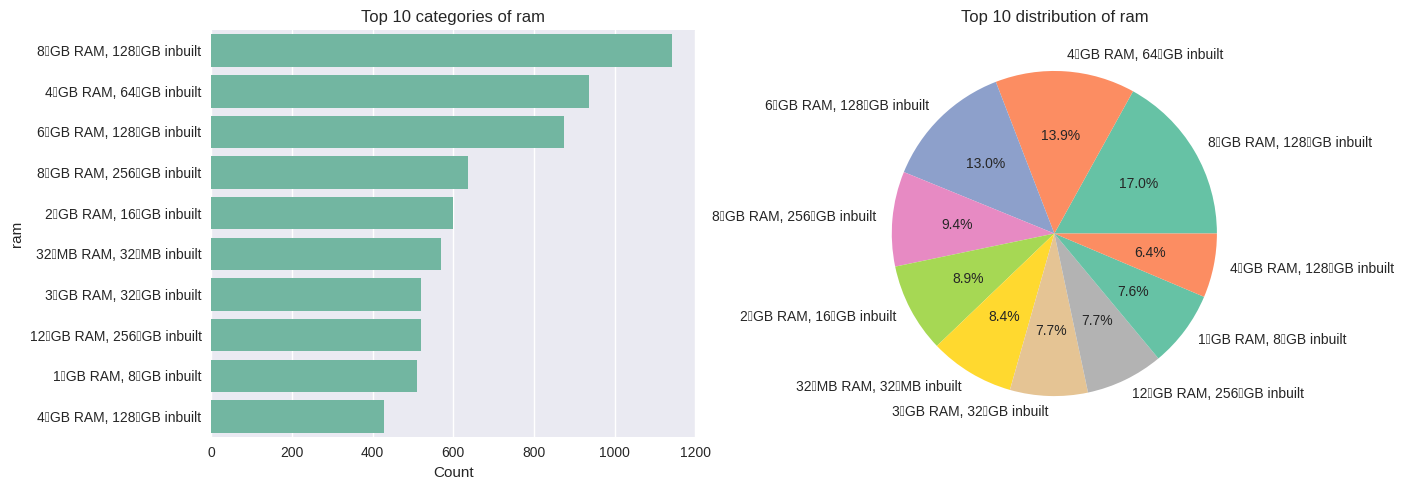

/tmp/ipython-input-897331548.py:22: UserWarning: Glyph 8201 (\N{THIN SPACE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8201 (\N{THIN SPACE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


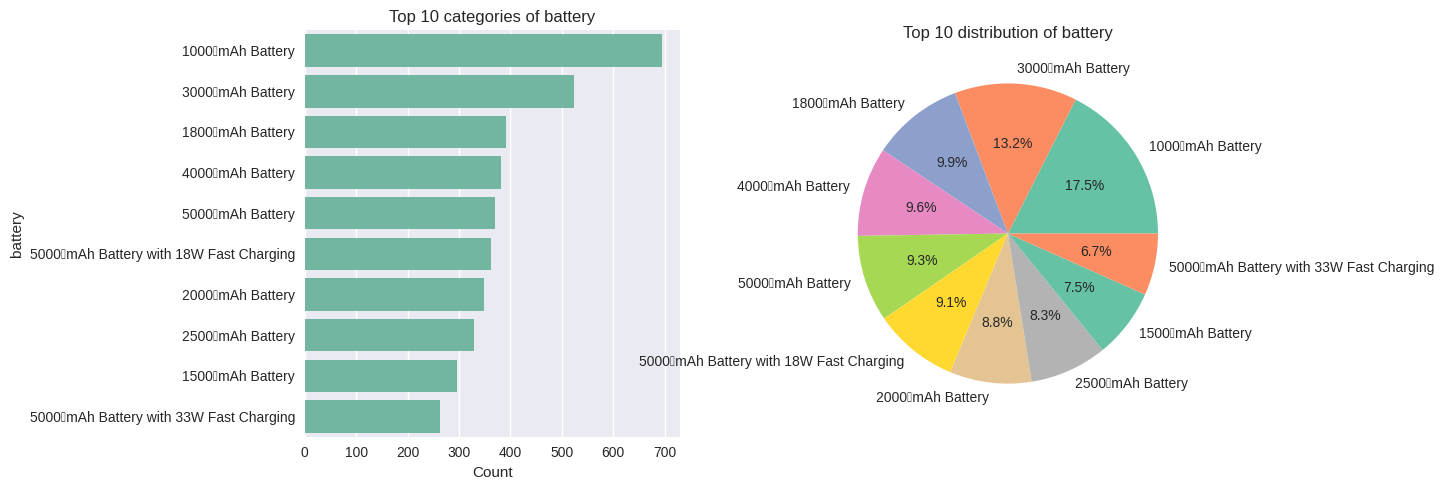

/tmp/ipython-input-897331548.py:22: UserWarning: Glyph 8201 (\N{THIN SPACE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8201 (\N{THIN SPACE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


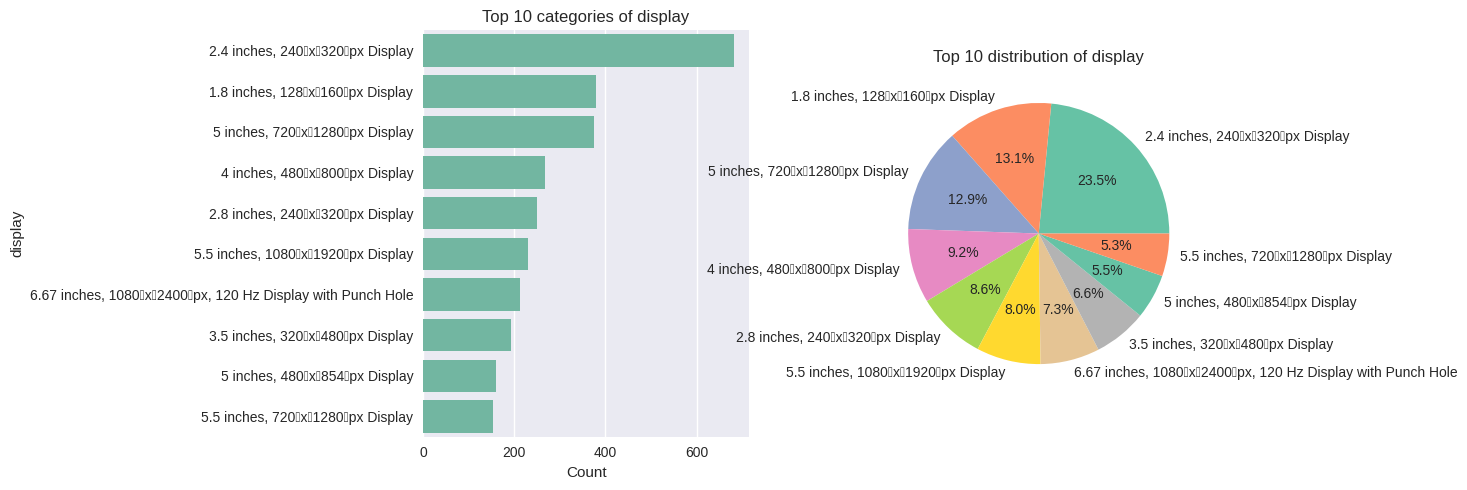

/tmp/ipython-input-897331548.py:22: UserWarning: Glyph 8201 (\N{THIN SPACE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8201 (\N{THIN SPACE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


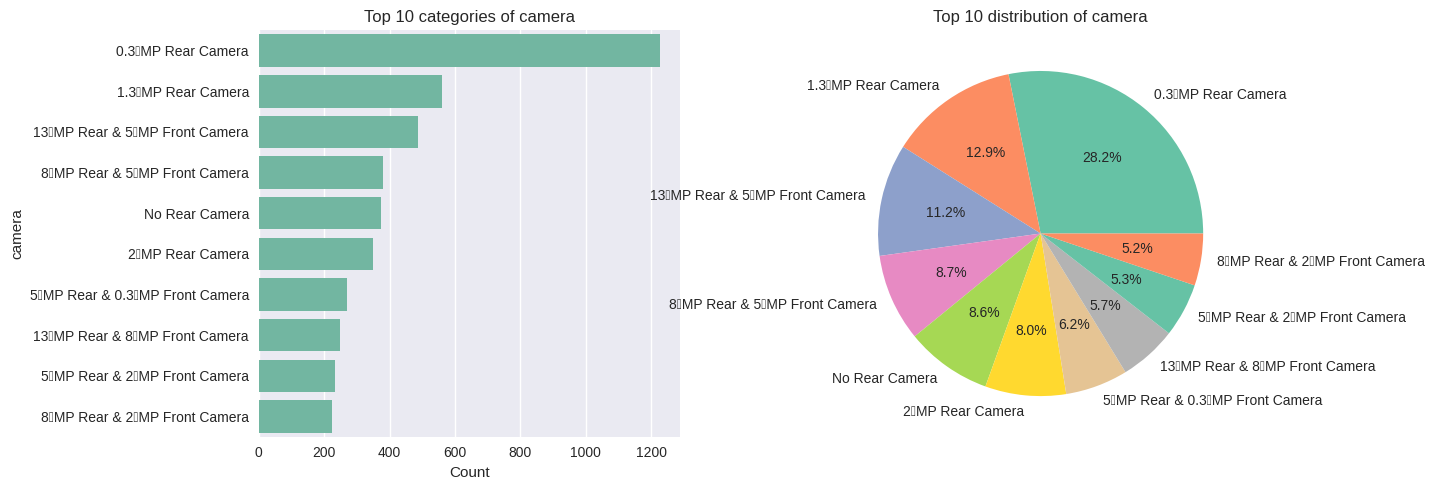

/tmp/ipython-input-897331548.py:22: UserWarning: Glyph 8201 (\N{THIN SPACE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8201 (\N{THIN SPACE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


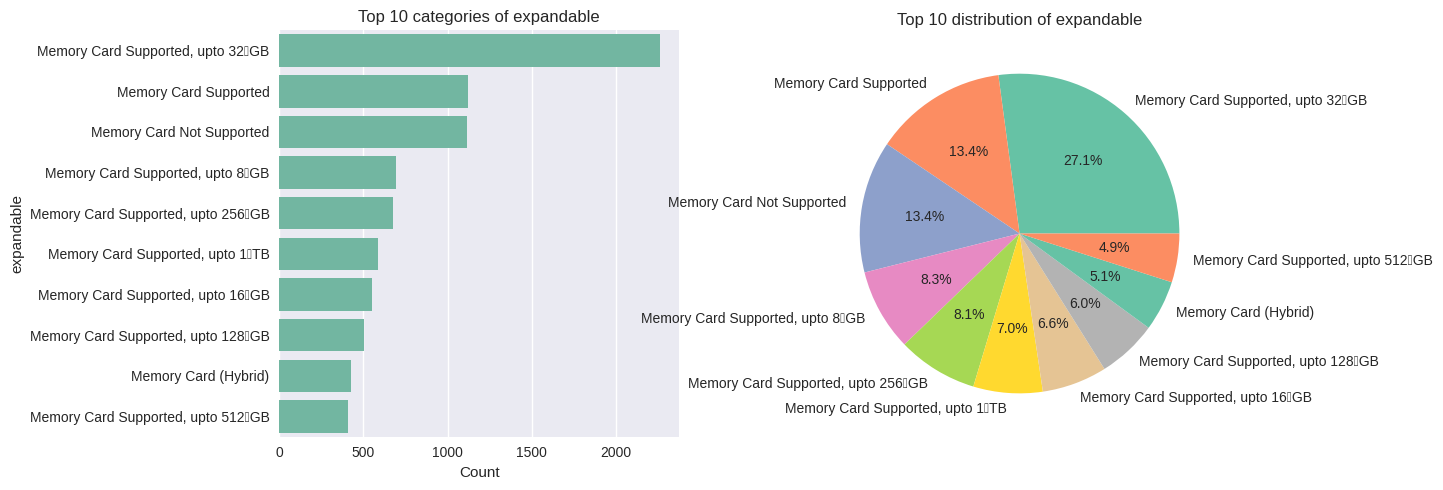

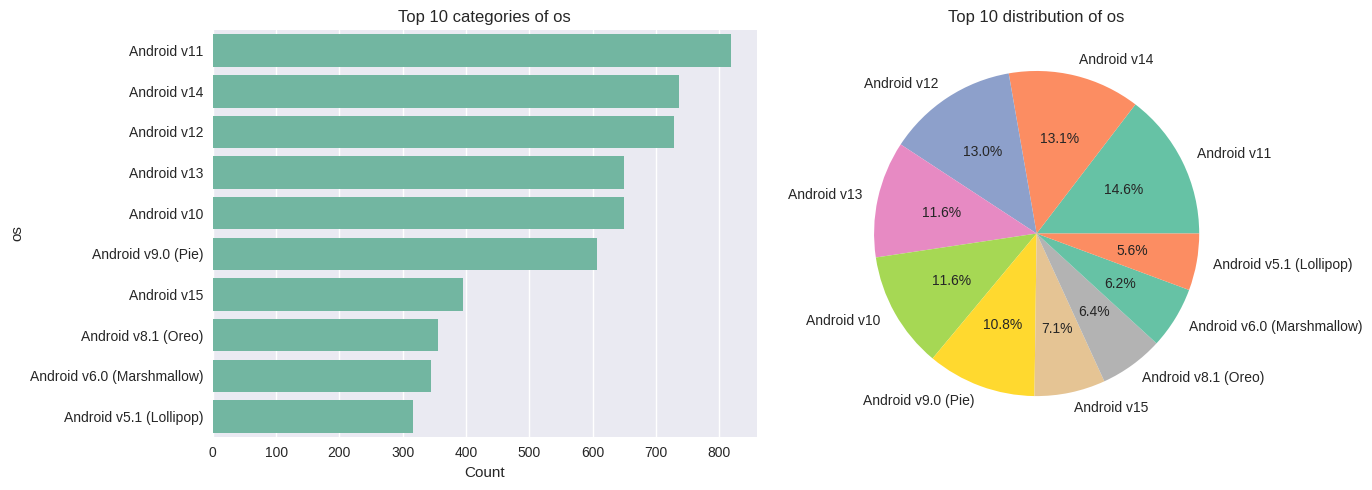

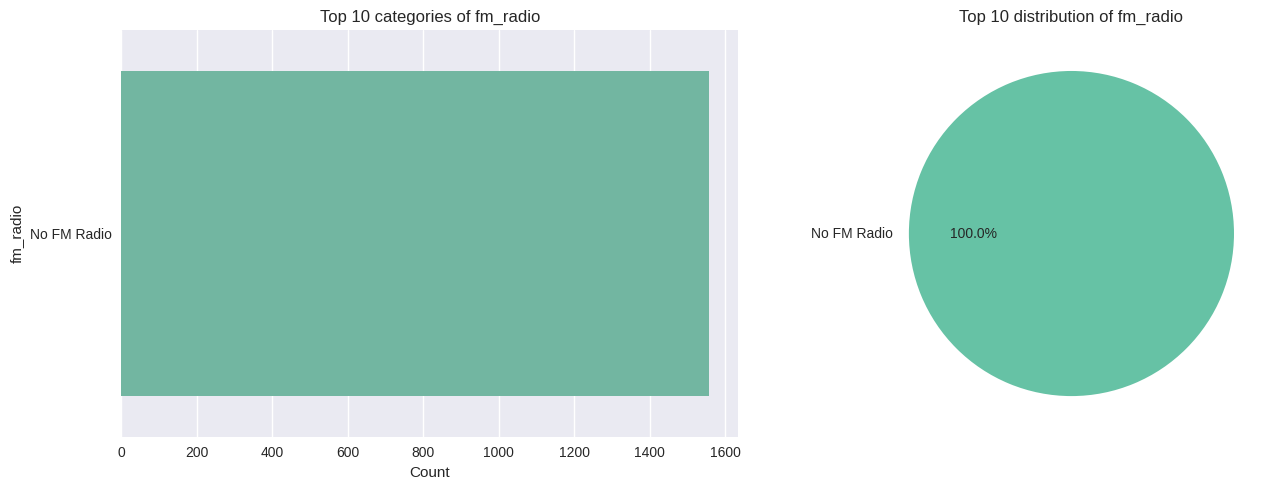

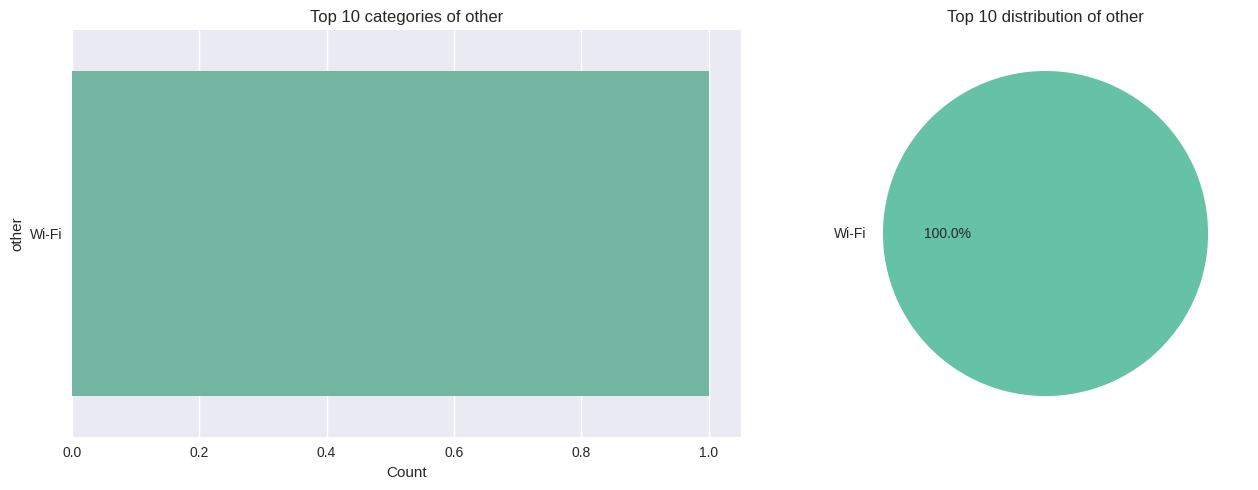

In [91]:
cat_cols = raw_data.select_dtypes(exclude='number').columns

for col in cat_cols:
    # Lấy top 10 giá trị phổ biến nhất cho gọn
    value_counts = raw_data[col].value_counts().head(10)

    fig, axes = plt.subplots(1, 2, figsize=(14,5))  # 1 hàng, 2 cột

    # Countplot
    sns.countplot(y=col,
                  data=raw_data,
                  order=value_counts.index,
                  ax=axes[0])
    axes[0].set_title(f"Top 10 categories of {col}")
    axes[0].set_xlabel("Count")
    axes[0].set_ylabel(col)

    # Pie chart
    axes[1].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
    axes[1].set_title(f"Top 10 distribution of {col}")

    plt.tight_layout()
    plt.show()

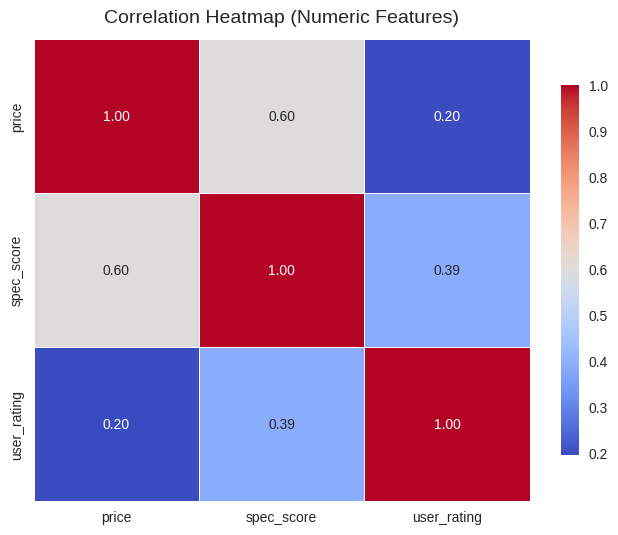

In [92]:
corr = raw_data[num_cols].corr()

# Vẽ heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr,
            annot=True,       # hiện giá trị hệ số tương quan
            cmap="coolwarm",  # bảng màu xanh-đỏ
            fmt=".2f",        # 2 chữ số thập phân
            linewidths=0.5,   # khoảng cách giữa các ô
            cbar_kws={"shrink": 0.8})  # thu nhỏ thanh màu bên cạnh

plt.title("Correlation Heatmap (Numeric Features)", fontsize=14, pad=12)
plt.show()

In [93]:

def extract_ram(storage):
    if pd.isna(storage):
        return None
    match = re.search(r'(\d+)\s*GB RAM', storage)
    return int(match.group(1)) if match else None

def extract_rom(storage):
    if pd.isna(storage):
        return None
    match = re.search(r'(\d+)\s*GB inbuilt', storage)
    return int(match.group(1)) if match else None

raw_data['ram_num'] = raw_data['ram'].apply(extract_ram)
raw_data['rom_num'] = raw_data['ram'].apply(extract_rom)
def extract_battery(battery):
    if pd.isna(battery):
        return None
    match = re.search(r'(\d+)\s*mAh', battery)
    return int(match.group(1)) if match else None

raw_data['battery_num'] = raw_data['battery'].apply(extract_battery)

def extract_screen_size(display):
    if pd.isna(display):
        return None
    match = re.search(r'(\d+\.\d+)\s*inches', display)
    return float(match.group(1)) if match else None

def extract_refresh_rate(display):
    if pd.isna(display):
        return None
    match = re.search(r'(\d+) Hz', display)
    return int(match.group(1)) if match else None

def extract_ppi(display):
    if pd.isna(display):
        return None

    s = str(display).lower().strip()
    size_inch = extract_screen_size(s)
    if not size_inch:
        return None

    # lấy độ phân giải (width x height)
    res_match = re.search(r"(\d+)\s*[x×]\s*(\d+)", s)
    if not res_match:
        return None
    w, h = int(res_match.group(1)), int(res_match.group(2))

    # tính PPI
    return round(np.sqrt(w**2 + h**2) / size_inch, 2)

raw_data['screen_size'] = raw_data['display'].apply(extract_screen_size)
raw_data['refresh_rate'] = raw_data['display'].apply(extract_refresh_rate)
raw_data['ppi'] = raw_data['display'].apply(extract_ppi)
raw_data[['ppi', 'screen_size', 'refresh_rate']].head()


,ppi,screen_size,refresh_rate
0,384.66,6.70,120.0
1,505.33,6.80,120.0
2,512.88,6.70,120.0
3,382.38,6.74,120.0
4,260.32,6.74,90.0
